[['soju', 'cola', 'wine', 'grape juice'], ['soju', 'orange Juice', 'cola', 'apple juice'], ['cola', 'beer', 'wine', 'apple juice', 'grape juice'], ['soju', 'cola', 'beer', 'apple juice'], ['orange juice', 'wine', 'grape juice']]
   apple juice   beer   cola  grape juice  orange Juice  orange juice   soju  \
0        False  False   True         True         False         False   True   
1         True  False   True        False          True         False   True   
2         True   True   True         True         False         False  False   
3         True   True   True        False         False         False   True   
4        False  False  False         True         False          True  False   

    wine  
0   True  
1  False  
2   True  
3  False  
4   True  
   support             itemsets
0      0.6        (apple juice)
1      0.8               (cola)
2      0.6        (grape juice)
3      0.6               (soju)
4      0.6               (wine)
5      0.6  (cola, apple juice)


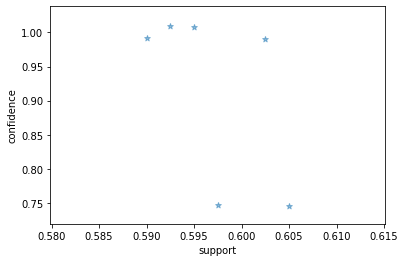

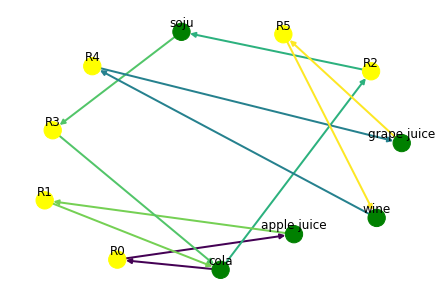

In [2]:
import csv

f= open('C:\python/basket_data.csv','r')
r = csv.reader(f)

dataset=[[] for i in range(5)]
idx=0
for line in r:
    for row in line:
        if len(row)!=0:
            dataset[idx].append(row)
    idx+=1
print(dataset)
f.close()

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary,columns=oht.columns_)
print(df)

frequent_itemsets=apriori(df,min_support=0.6,use_colnames=True)
print(frequent_itemsets)

association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7)
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1.2)
print(rules)

support=list(rules['support'].values)
confidence=list(rules['confidence'].values)

import random
import matplotlib.pyplot as plt

for i in range(len(support)):
    support[i]=support[i]+0.0025*(random.randint(1,10)-5)
    confidence[i]=confidence[i]+0.0025*(random.randint(1,10)-5)

plt.scatter(support,confidence,alpha=0.5,marker="*")
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

import numpy as np

def draw_graph(rules,rules_to_show):
    import networkx as nx
    G1 = nx.DiGraph()
    
    color_map = []
    N = 50
    colors = np.random.rand(N)
    strs = ['R0', 'R1','R2','R3','R4','R5','R6','R7','R8','R9','R10','R11']
    
    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a,"R"+str(i),color=colors[i],weight=2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i),c,color=colors[i],weight=2)
            
    for node in G1:
        found_a_string = False
        for item in strs:
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')
            
    edges=G1.edges()
    colors=[G1[u][v]['color'] for u,v in edges]
    weights=[G1[u][v]['weight'] for u,v in edges]
    
    pos=nx.spring_layout(G1,k=16,scale=1)
    nx.draw(G1, pos, edges=edges, node_color=color_map, edge_color=colors, 
       width=weights, font_size=16, with_labels=False)
    
    for p in pos: # raise text positions
        pos[p][1] += 0.07
    nx.draw_networkx_labels(G1,pos)
    plt.show()

draw_graph(rules,6)

